# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
import numpy as np
from config import api_key
from pprint import pprint
import time
from scipy.stats import linregress

## Generate Cities List

In [ ]:
# Get random numbers for latitude and longitude then place in a dataframe

city_df=pd.DataFrame({"long":(np.random.uniform(-180,180,1500)), "lat":(np.random.uniform(-90,90,1500))})
# city_df.head()
# city_df.tail()
print(city_df)

# Use Citipy to Retrieve City Names

In [ ]:
# Create lists to store city and country names
# Source: https://github.com/wingchen/citipy
citi=[]
country=[]

for index, row in city_df.iterrows():
    latitude=row['lat']
    longitude=row['long']
    city=citipy.nearest_city(latitude,longitude)
    cityname=city.city_name
    cntryname=city.country_code
    if cityname not in citi:
        citi.append(cityname)
        country.append(cntryname)
    else:
        pass
print(citi)
print(country)

# Adds new lists to dataframe
tudes={"City":citi,"Country":country}

# Make a dataframe from the dictionary
tudes_df=pd.DataFrame(tudes)
tudes_df

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# https://api.openweathermap.org/data/2.5/weather?q=London,uk&appid=api_key&units=imperial
# https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=api_key&q=London,uk

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url=f"{url}&units={units}&appid={api_key}&q="
# query_url = f"{url}appid={api_key}&units={units}&q="

cityid = []
long = []
lat = []
temp = []
humidity = []
clouds = []
wind = []
maxtemp = []
date = []
cityagain=[]
countryagain=[]
# # Build query URL
# check if data is available before appending
# for City in city_df:
#     response=requests.get(query_url + cityposition +","+ cntryposition).json()
    
#     try:
#         if response["message"]=="city not found":
#             print("The city can't be found")
#     except:
#         cityagain.append(City)
#         countryagain.append(response['sys']['country'])
#         cityid.append(response['id'])
#         long.append(response['coord']['lon'])
#         lat.append(response['coord']['lat'])
#         temp.append(response['main']['temp'])
#         humidity.append(response['main']['humidity'])
#         clouds.append(response['clouds']['all'])
#         wind.append(response['wind']['speed'])
#         maxtemp.append(response['main']['temp_max'])
#         date.append(response['dt'])
#         print(f'The city name is: {city}')
#         print(f'The city ID is: {response["id"]}')
#         print(f'The longitude information received is: {response["coord"]["lon"]}')
#         print(f'The latitude information received is: {response["coord"]["lat"]}')
#         print(f'The longitude information received is: {response["coord"]["lon"]}')
#         print(f'The temperature is: {response["main"]["temp"]}')
#         print(f'The humidity is: {response["main"]["humidity"]}')
#         print(f'The cloudiness is: {response["clouds"]["all"]}')
#         print(f'The wind speed is: {response["wind"]["speed"]}')
#         print(f'The high is: {response["main"]["temp_max"]}')
#         print(f"                          ")
        
for index, row in tudes_df.iterrows():
    cityposition=row['City']
    cntryposition= row['Country']
    time.sleep(1)
    response=requests.get(query_url + cityposition +","+ cntryposition).json()
    # time.sleep(1)
    # pprint(response)
    
    try:
        if (response["message"]=="city not found"):
            print(f"The city can't be found")
            print(f"                          ")
            # pass
                  
    except:
        if len(cityid)<500:
            cityagain.append(response['name'])
            countryagain.append(response['sys']['country'])
            cityid.append(response['id'])
            long.append(response['coord']['lon'])
            lat.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            humidity.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            maxtemp.append(response['main']['temp_max'])
            date.append(response['dt'])
            print(f'The city name is: {response["name"]}')
            print(f'The country is: {response["sys"]["country"]}')
            print(f'The city ID is: {response["id"]}')
            print(f'The longitude information received is: {response["coord"]["lon"]}')
            print(f'The latitude information received is: {response["coord"]["lat"]}')
            print(f'The longitude information received is: {response["coord"]["lon"]}')
            print(f'The temperature is: {response["main"]["temp"]}')
            print(f'The humidity is: {response["main"]["humidity"]}')
            print(f'The cloudiness is: {response["clouds"]["all"]}')
            print(f'The wind speed is: {response["wind"]["speed"]}')
            print(f'The high is: {response["main"]["temp_max"]}')
            print(f"                          ")
        else:
            break
# cityposition not in cityagain and len(cityid)<500:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Create dictionary of lists above
weather={"City":cityagain,"Country":countryagain,"City ID":cityid,"Latitude":lat,"Longitude":long,"Temperature":temp,"Max Temp":maxtemp,"Humidity":humidity,"Wind":wind,"Clouds":clouds,"Date":date}

# Make a dataframe from the dictionary
weather_df=pd.DataFrame(weather)


# Save the updated dataframe as a csv
weather_df.to_csv("../output_data/weather_file.csv", encoding="utf-8", index=False)
weather_df

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
highhumid=weather_df.loc[(weather_df['Humidity']>100)]
highhumid

In [ ]:
#  Get the indices of cities that have humidity over 100%.
# There are no cities with humidity over 100%

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# NOT APPLICABLE

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
# Creates scatter plot using previously created dataframe
fig1=weather_df.plot.scatter(x='Latitude',y='Temperature',c='DarkBlue',title="Latitude vs Temperature (F)")
plt.savefig("../output_data/fig1.png")

## Latitude vs. Humidity Plot

In [ ]:
fig2=weather_df.plot.scatter(x='Latitude',y='Humidity',c='DarkBlue',title="Latitude vs Humidity")
plt.savefig("../output_data/fig2.png")

## Latitude vs. Cloudiness Plot

In [ ]:
fig3=weather_df.plot.scatter(x='Latitude',y='Clouds',c='DarkBlue',title="Latitude vs Clouds")
plt.savefig("../output_data/fig3.png")

## Latitude vs. Wind Speed Plot

In [ ]:
fig4=weather_df.plot.scatter(x='Latitude',y='Wind',c='DarkBlue',title="Latitude vs Wind")
plt.savefig("../output_data/fig4.png")

## Linear Regression

In [ ]:
# Plots linear regression equation and plot along with scatter plot
# Divide into hemispheres
north=weather_df.loc[(weather_df["Latitude"]>0)]
south=weather_df.loc[(weather_df["Latitude"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

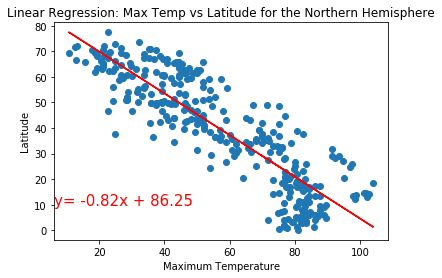

In [30]:
x_values=north['Max Temp']
y_values=north['Latitude']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.title('Linear Regression: Max Temp vs Latitude for the Northern Hemisphere')
plt.savefig("../output_data/fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

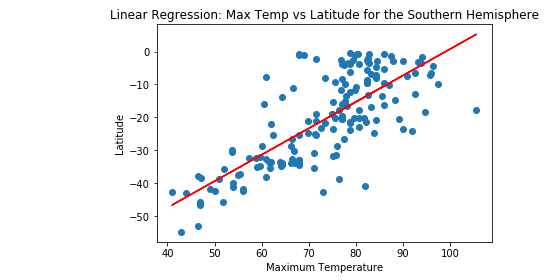

In [31]:
x_values=south['Max Temp']
y_values=south['Latitude']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.title('Linear Regression: Max Temp vs Latitude for the Southern Hemisphere')
plt.savefig("../output_data/fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

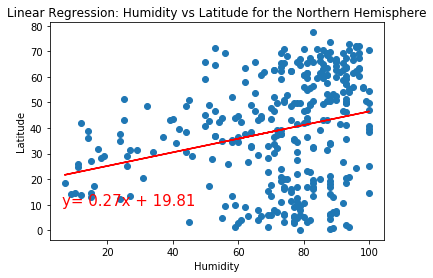

In [32]:
x_values=north['Humidity']
y_values=north['Latitude']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Linear Regression: Humidity vs Latitude for the Northern Hemisphere')
plt.savefig("../output_data/fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# print(f"The ID of the city is: {cityid}")
# print(f"The latitude information received is: {lat}")
# print(f"The longitude information received is: {long}")
# print(f"The temperature information received is: {temp}")
# print(f"The humidity information received is: {humidity}")
# print(f"The cloud information received is: {clouds}")
# print(f"The wind speed information received is: {wind}")
# print(f"The maximum temperature received is: {maxtemp}")
# print(f"The date received is: {date}")
# print(f"                                                ")
    
    
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"

# # # Build partial query URL
# query_url = f"{url}appid={api_key}&units={units}&q="

#     country=city.country_code
#     country.append(country)
# print(citi)
# print(country)
# cities = ["Paris", "London", "Oslo", "Beijing"]

# url="http://api.openweathermap.org/data/2.5/weather?lat={87.6298}&lon={41.8781}&appid={api_key}"
# # url="http://api.openweathermap.org/data/2.5/weather?q={Chicago}&appid={api_key}?"
# citydata = requests.get(url).json()
# print(json.dumps(citydata, indent=4, sort_keys=True))

# Print the json
# print(geo_data)
# response=requests.get(f"{query_url}'lat='{87.6298}'&lon='{41.8781}").json()
# print(response)

# # set up lists to hold reponse info
# citi = []
# cityid = []
# long = []
# lat = []
# temp = []
# humidity = []
# clouds = []
# wind = []
# country = []

# for index, row in city_df.iterrows():
#     latitude=row['lat']
#     longitude=row['long']
#     response=requests.get(f"{query_url}'lat='{latitude}'&lon='{longitude}").json()
#     print(response)
#     citi.append(response['name'])
#     cityid.append(response['sys']['id'])
#     long.append(response['coord']['lon'])
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])
#     humidity.append(response['main']['humidity'])
#     clouds.append(response['clouds']['all'])
#     wind.append(response['wind']['speed'])
#     country.append(response['sys']['country'])

# Loop through the list of cities and perform a request for data on each
# api.openweathermap.org/data/2.5/find?q=London&units=imperial
# for city in cities:
    
#     response = requests.get(query_url + city).json()
#     citi.append(response['name'])
#     cityid.append(response['sys']['id'])
#     long.append(response['coord']['lon'])
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])
#     humidity.append(response['main']['humidity'])
#     clouds.append(response['clouds']['all'])
#     wind.append(response['wind']['speed'])
#     country.append(response['sys']['country'])
    
# print(f"The ID of the city is: {cityid}")
# print(f"The city information received is: {citi}")
# print(f"The country information received is: {country}")
# print(f"The latitude information received is: {lat}")
# print(f"The longitude information received is: {long}")
# print(f"The temperature information received is: {temp}")
# print(f"The humidity information received is: {humidity}")
# print(f"The cloud information received is: {clouds}")
# print(f"The wind speed information received is: {wind}")



# # Save config information
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "Chicago"

# # Build query URL
# query_url = url + "appid=" + api_key + "&q=" + city

# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# # Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")
# pprint(weather_json)